<a href="https://colab.research.google.com/github/Luchog3324/Comisi-n-75690-Data-Science-II/blob/main/LucianoGiglio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from scipy.stats import norm
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, RobustScaler, StandardScaler

### **Preguntas de interés**

# ¿Cuál es el promedio de los estudiantes?

# ¿Qué tan tanto influye el tiempo de estudio con sus notas?

# ¿Las horas de sueño son un factor escencial?

# ¿Las redes sociales atentan contra la salud mental y así también con las notas?

# ¿Cuales son los valores a destacar para marcas un camino de actitudes correctas a la hora de lograr un gran desempeño academico?

# ¿Cuál es el mejor promedio?

# **Se carga la base de datos, la cual fue tomada desde kaggle, copiando el link de Git Hub.**

In [ ]:
hab = pd.read_csv('https://raw.githubusercontent.com/Luchog3324/Lucho09/refs/heads/main/student_habits_performance.csv')

In [ ]:
hab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [ ]:
hab.shape

(1000, 16)

In [ ]:
hab.columns

Index(['student_id', 'age', 'gender', 'study_hours_per_day',
       'social_media_hours', 'netflix_hours', 'part_time_job',
       'attendance_percentage', 'sleep_hours', 'diet_quality',
       'exercise_frequency', 'parental_education_level', 'internet_quality',
       'mental_health_rating', 'extracurricular_participation', 'exam_score'],
      dtype='object')

In [ ]:
hab.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1000.0,20.4980,2.308100,17.0,18.750,20.0,23.000,24.0
study_hours_per_day,1000.0,3.5501,1.468890,0.0,2.600,3.5,4.500,8.3
social_media_hours,1000.0,2.5055,1.172422,0.0,1.700,2.5,3.300,7.2
netflix_hours,1000.0,1.8197,1.075118,0.0,1.000,1.8,2.525,5.4
attendance_percentage,1000.0,84.1317,9.399246,56.0,78.000,84.4,91.025,100.0
sleep_hours,1000.0,6.4701,1.226377,3.2,5.600,6.5,7.300,10.0
exercise_frequency,1000.0,3.0420,2.025423,0.0,1.000,3.0,5.000,6.0
mental_health_rating,1000.0,5.4380,2.847501,1.0,3.000,5.0,8.000,10.0
exam_score,1000.0,69.6015,16.888564,18.4,58.475,70.5,81.325,100.0


# Se logra hacer una análisis general de la situación para lograr ver cuales son las primeras columnas de análisis y los primeros indicadores.

In [ ]:
hab.isnull().sum()


,0
student_id,0
age,0
gender,0
study_hours_per_day,0
social_media_hours,0
netflix_hours,0
part_time_job,0
attendance_percentage,0
sleep_hours,0
diet_quality,0


In [ ]:
hab.isnull().sum()

,0
student_id,0
age,0
gender,0
study_hours_per_day,0
social_media_hours,0
netflix_hours,0
part_time_job,0
attendance_percentage,0
sleep_hours,0
diet_quality,0


# Pasa a borrarse los datos nulos ya que no se considera que la variable altere los indicadores.

In [ ]:
# Elimina todas las filas que contienen al menos un valor nulo
hab = hab.dropna() # Corrected: apply dropna to hab and reassign to hab

print("\nDataFrame sin filas con valores nulos:")
print(hab) # Corrected: print the hab DataFrame after dropping nulls


DataFrame sin filas con valores nulos:
    student_id  age  gender  study_hours_per_day  social_media_hours  \
0        S1000   23  Female                  0.0                 1.2   
1        S1001   20  Female                  6.9                 2.8   
2        S1002   21    Male                  1.4                 3.1   
3        S1003   23  Female                  1.0                 3.9   
4        S1004   19  Female                  5.0                 4.4   
..         ...  ...     ...                  ...                 ...   
995      S1995   21  Female                  2.6                 0.5   
996      S1996   17  Female                  2.9                 1.0   
997      S1997   20    Male                  3.0                 2.6   
998      S1998   24    Male                  5.4                 4.1   
999      S1999   19  Female                  4.3                 2.9   

     netflix_hours part_time_job  attendance_percentage  sleep_hours  \
0              1.1     

In [ ]:
hab.isnull().sum()

,0
student_id,0
age,0
gender,0
study_hours_per_day,0
social_media_hours,0
netflix_hours,0
part_time_job,0
attendance_percentage,0
sleep_hours,0
diet_quality,0


# A través de varios histogramas y mapas de calor de corrlaciones logramos ver las principales indicios de cada variable, para tener conclusiones más claras sobre los indicadores destacados de nuestro dataset.

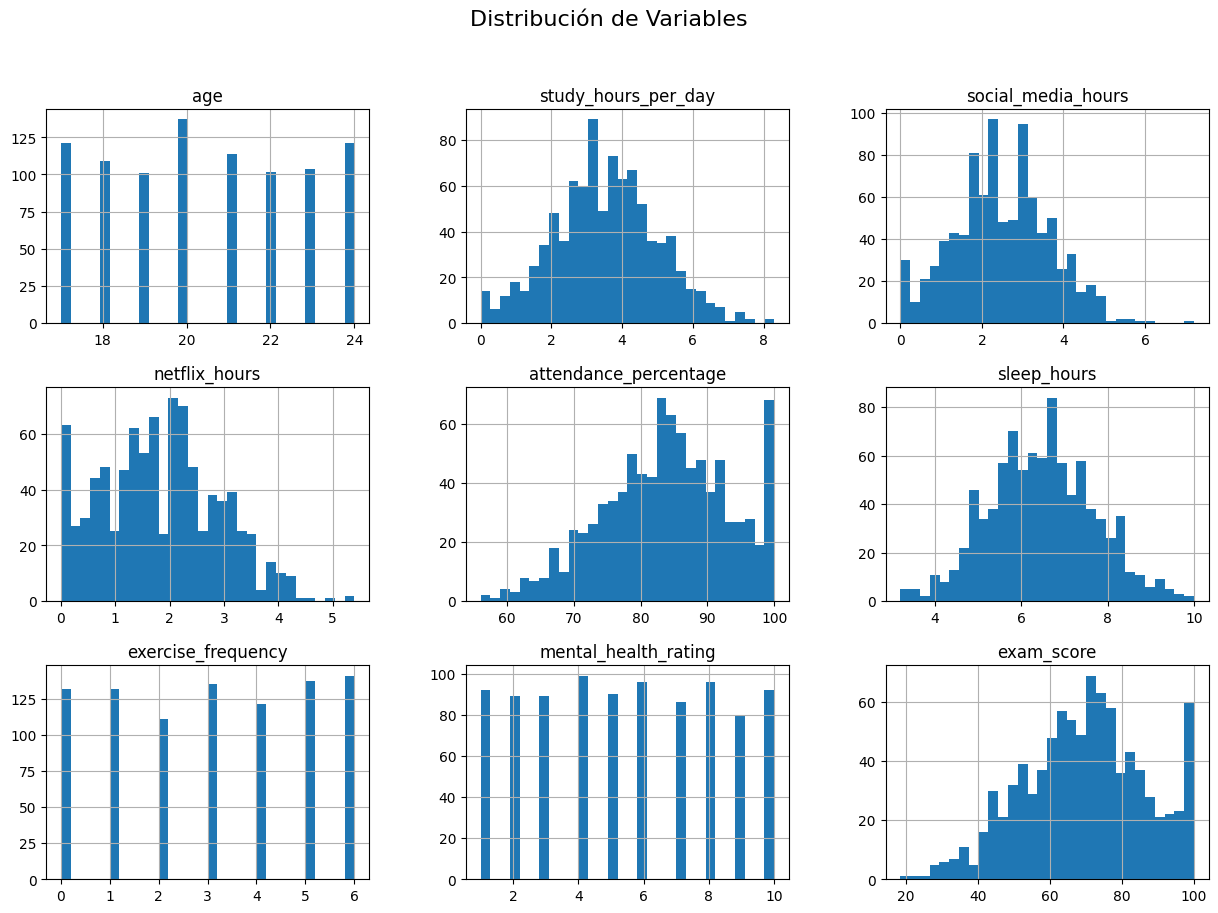

ValueError: could not convert string to float: 'S1000'

<Figure size 1200x800 with 0 Axes>

In [ ]:
# Histograma de todas las variables numéricas
hab.hist(bins=30, figsize=(15,10))
plt.suptitle('Distribución de Variables', fontsize=16)
plt.show()

# Mapa de calor de correlaciones
plt.figure(figsize=(12, 8))
sns.heatmap(hab.corr(), annot=True, cmap='coolwarm')
plt.title("Correlación entre variables")
plt.show()


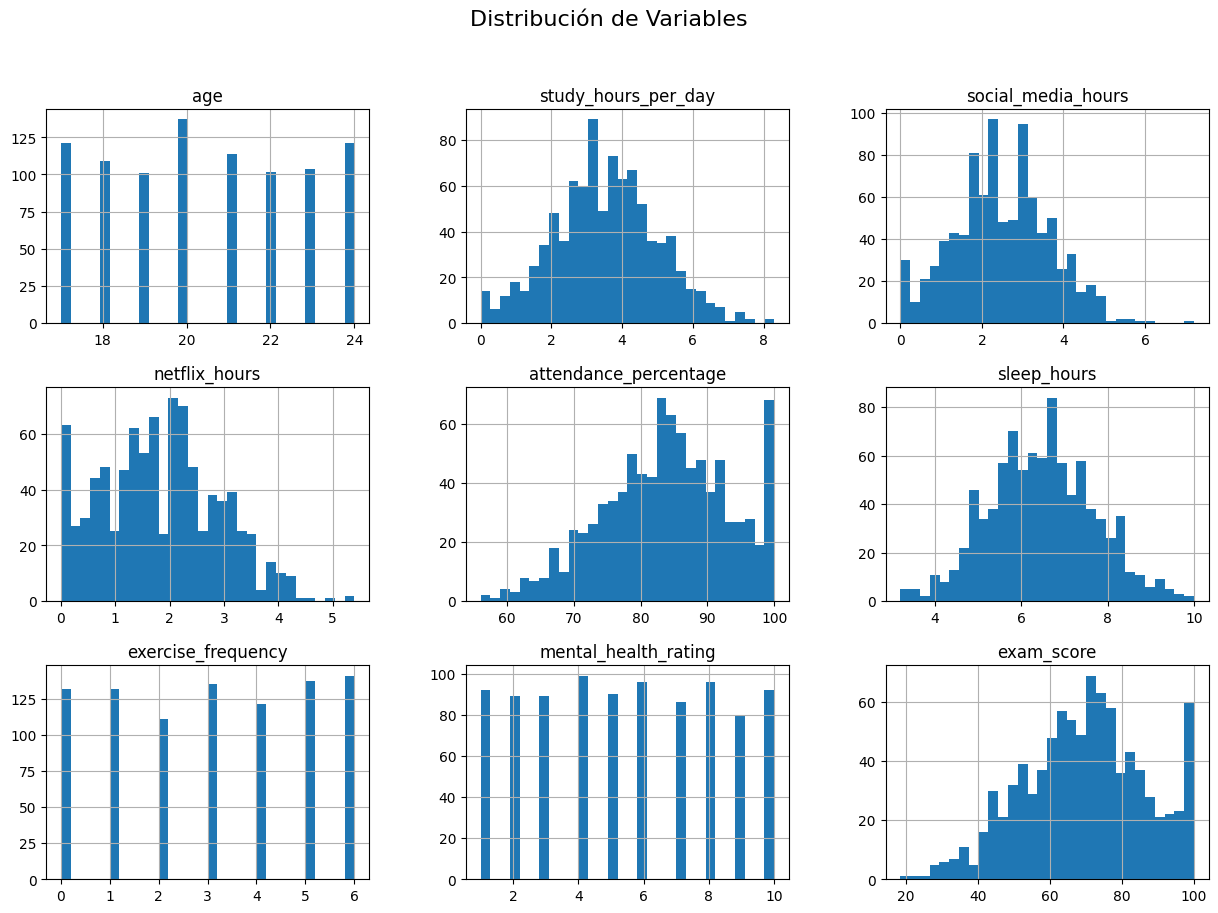

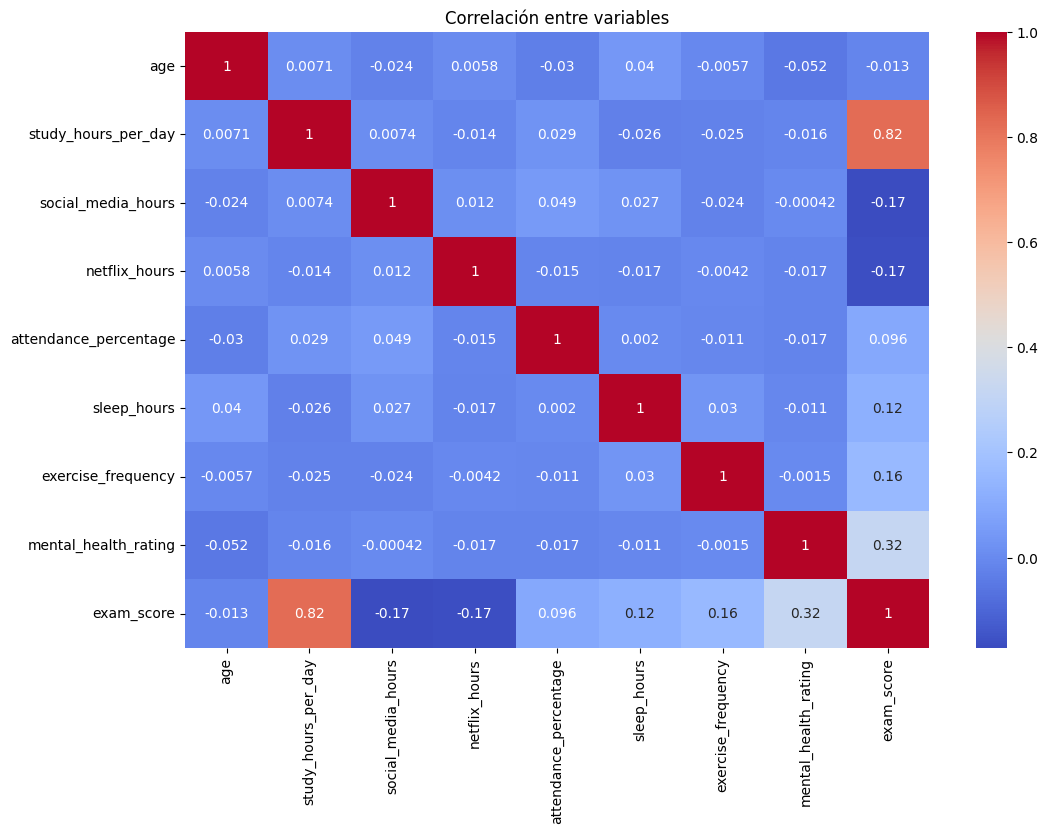

In [ ]:
# Histograma de todas las variables numéricas
hab.hist(bins=30, figsize=(15,10))
plt.suptitle('Distribución de Variables', fontsize=16)
plt.show()

# Mapa de calor de correlaciones
plt.figure(figsize=(12, 8))
# Use numeric_only=True to exclude non-numeric columns from the correlation calculation
sns.heatmap(hab.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlación entre variables")
plt.show()

In [ ]:
# Correlación con la calificación del examen final

# Print the columns to verify the exact name of the final grade column
print(hab.columns)

# Replace 'nombre_real_calificacion' with the actual column name for final grade
final_grade_column_name = 'calificacion_final' # Replace with the actual column name

# Check if the column exists in the DataFrame
if final_grade_column_name in hab.columns:
    # Check the data type of the column
    if pd.api.types.is_numeric_dtype(hab[final_grade_column_name]):
        # If it's already numeric, calculate correlation
        numeric_hab = hab.select_dtypes(include=np.number)
        correlation_with_grade = numeric_hab.corr()[final_grade_column_name].sort_values(ascending=False)
        print(correlation_with_grade)
    else:
        # If not numeric, try to convert it (handle errors if conversion fails)
        try:
            hab[final_grade_column_name] = pd.to_numeric(hab[final_grade_column_name], errors='coerce')
            # After conversion, select numeric columns and calculate correlation
            numeric_hab = hab.select_dtypes(include=np.number)
            # Ensure the column is now in numeric_hab before calculating correlation
            if final_grade_column_name in numeric_hab.columns:
                correlation_with_grade = numeric_hab.corr()[final_grade_column_name].sort_values(ascending=False)
                print(correlation_with_grade)
            else:
                print(f"Column '{final_grade_column_name}' is numeric but not included in the numeric subset.")
        except ValueError as e:
            print(f"Could not convert column '{final_grade_column_name}' to numeric: {e}")
else:
    print(f"Column '{final_grade_column_name}' not found in the DataFrame.")

Index(['student_id', 'age', 'gender', 'study_hours_per_day',
       'social_media_hours', 'netflix_hours', 'part_time_job',
       'attendance_percentage', 'sleep_hours', 'diet_quality',
       'exercise_frequency', 'parental_education_level', 'internet_quality',
       'mental_health_rating', 'extracurricular_participation', 'exam_score'],
      dtype='object')
Column 'calificacion_final' not found in the DataFrame.


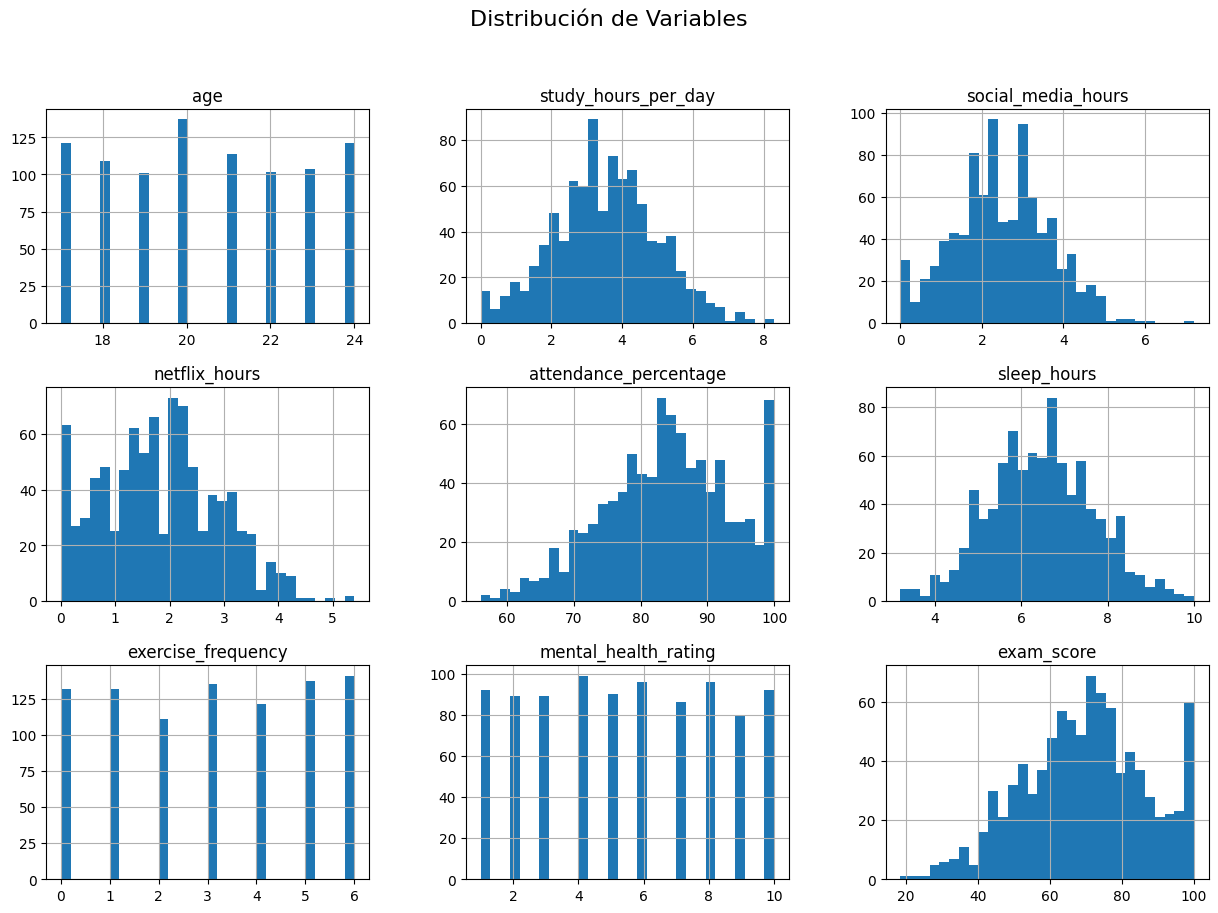

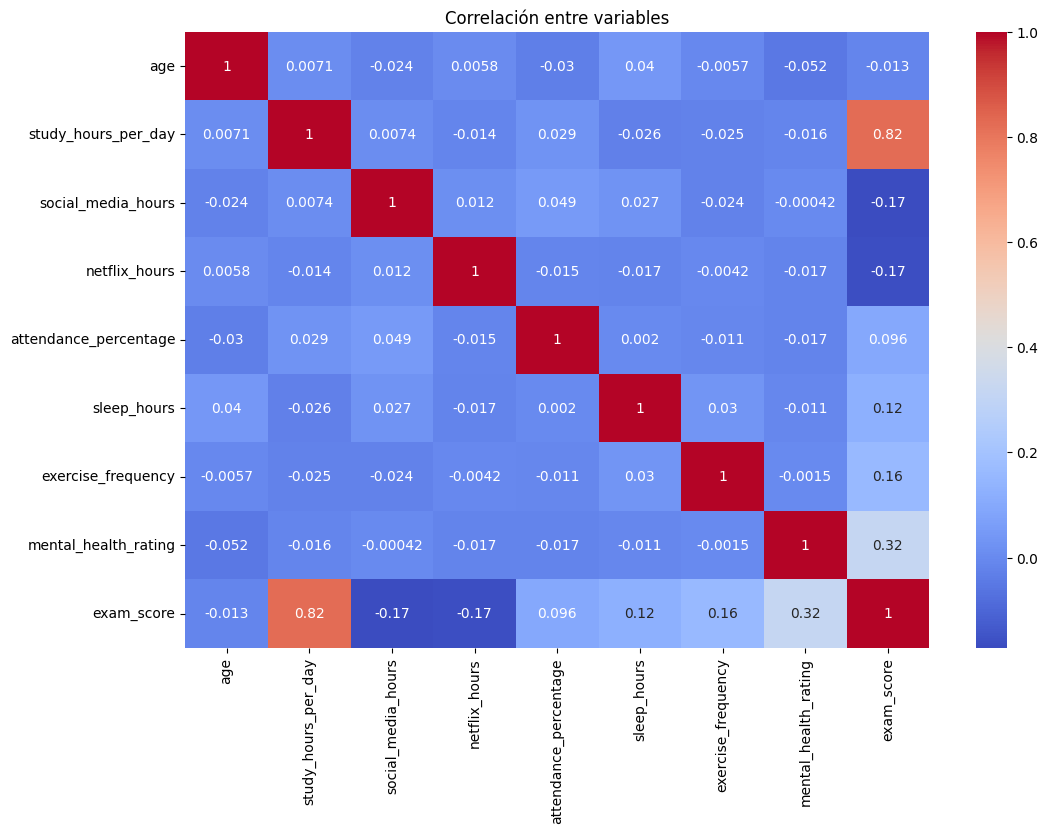

Index(['student_id', 'age', 'gender', 'study_hours_per_day',
       'social_media_hours', 'netflix_hours', 'part_time_job',
       'attendance_percentage', 'sleep_hours', 'diet_quality',
       'exercise_frequency', 'parental_education_level', 'internet_quality',
       'mental_health_rating', 'extracurricular_participation', 'exam_score'],
      dtype='object')
Column 'calificacion_final' not found in the DataFrame.


In [ ]:
# Histograma de todas las variables numéricas
hab.hist(bins=30, figsize=(15,10))
plt.suptitle('Distribución de Variables', fontsize=16)
plt.show()

# Mapa de calor de correlaciones
plt.figure(figsize=(12, 8))
sns.heatmap(hab.corr(numeric_only=True), annot=True, cmap='coolwarm') # Added numeric_only=True
plt.title("Correlación entre variables")
plt.show()

# Correlación con la calificación del examen final
# Print the columns to verify the exact name of the final grade column
print(hab.columns)

# Replace 'nombre_real_calificacion' with the actual column name for final grade
final_grade_column_name = 'calificacion_final' # Replace with the actual column name

# Check if the column exists in the DataFrame
if final_grade_column_name in hab.columns:
    # Check the data type of the column
    if pd.api.types.is_numeric_dtype(hab[final_grade_column_name]):
        # If it's already numeric, calculate correlation
        numeric_hab = hab.select_dtypes(include=np.number)
        correlation_with_grade = numeric_hab.corr()[final_grade_column_name].sort_values(ascending=False)
        print(correlation_with_grade)
    else:
        # If not numeric, try to convert it (handle errors if conversion fails)
        try:
            hab[final_grade_column_name] = pd.to_numeric(hab[final_grade_column_name], errors='coerce')
            # After conversion, select numeric columns and calculate correlation
            numeric_hab = hab.select_dtypes(include=np.number)
            # Ensure the column is now in numeric_hab before calculating correlation
            if final_grade_column_name in numeric_hab.columns:
                correlation_with_grade = numeric_hab.corr()[final_grade_column_name].sort_values(ascending=False)
                print(correlation_with_grade)
            else:
                print(f"Column '{final_grade_column_name}' is numeric but not included in the numeric subset.")
        except ValueError as e:
            print(f"Could not convert column '{final_grade_column_name}' to numeric: {e}")
else:
    print(f"Column '{final_grade_column_name}' not found in the DataFrame.")

# Las horas de estudio diario son el factor más importante a la hora de ver el buen desempeño académico. La salud física y mental tienen muchos efectos positivos aunque menores. El uso excesivo de redes sociales y plataformas de entretenimiento esta levemente asociado a peores resultados.


Index(['student_id', 'age', 'gender', 'study_hours_per_day',
       'social_media_hours', 'netflix_hours', 'part_time_job',
       'attendance_percentage', 'sleep_hours', 'diet_quality',
       'exercise_frequency', 'parental_education_level', 'internet_quality',
       'mental_health_rating', 'extracurricular_participation', 'exam_score'],
      dtype='object')


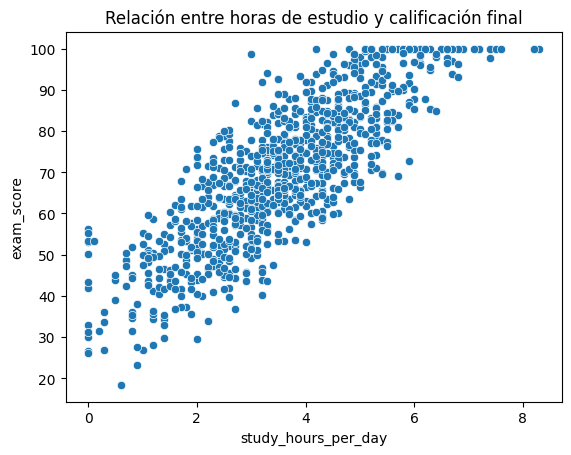

In [ ]:
print(hab.columns)

sns.scatterplot(data=hab, x='study_hours_per_day', y='exam_score')
plt.title("Relación entre horas de estudio y calificación final")
plt.show()

# En los boxplot que siguen logramos ver la influencia de la buena solud mental para lograr un buen desempeño académico. Como así también el legado educativo parental, algo que puede ser muy influyente.

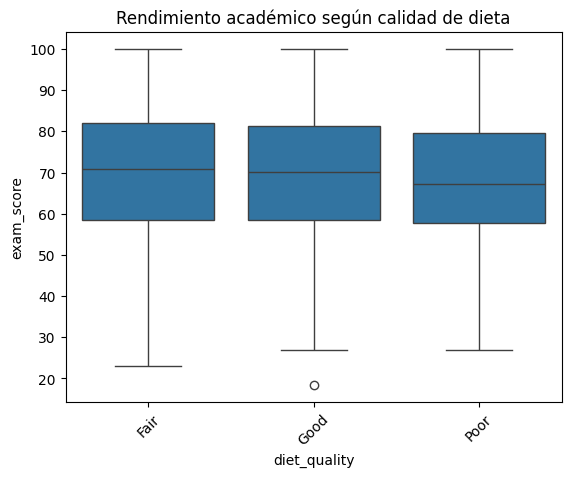

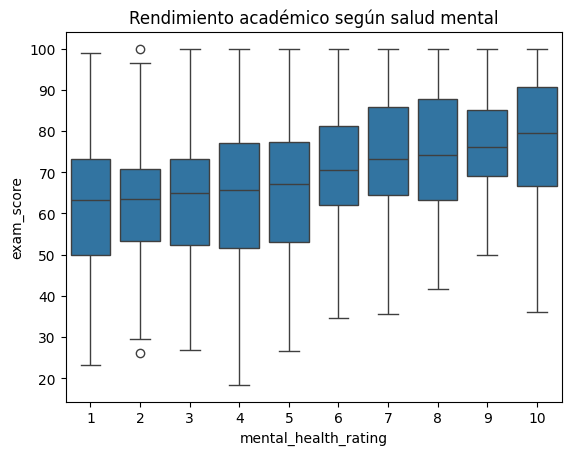

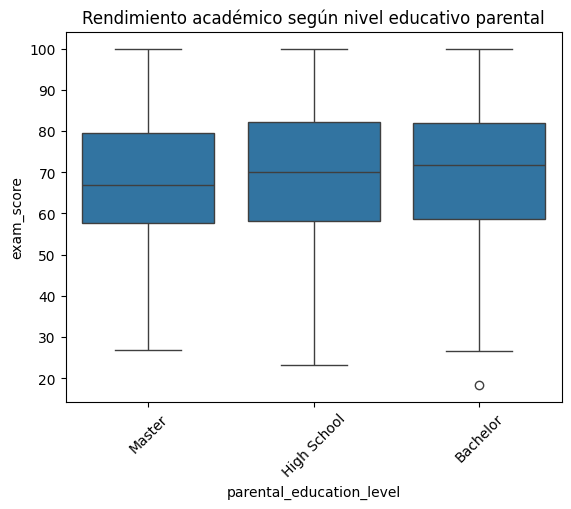

In [ ]:
# Boxplot por calidad de dieta
sns.boxplot(data=hab, x='diet_quality', y='exam_score')
plt.title("Rendimiento académico según calidad de dieta")
plt.xticks(rotation=45)
plt.show()

# Boxplot por salud mental
sns.boxplot(data=hab, x='mental_health_rating', y='exam_score')
plt.title("Rendimiento académico según salud mental")
plt.show()

# Boxplot por educación parental
sns.boxplot(data=hab, x='parental_education_level', y='exam_score')
plt.title("Rendimiento académico según nivel educativo parental")
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Promedios de score por género
print(hab.groupby('gender')['exam_score'].mean())

# Promedios por participación extracurricular
print(hab.groupby('extracurricular_participation')['exam_score'].mean())

# Promedios por dieta y salud mental
print(hab.groupby(['diet_quality', 'mental_health_rating'])['exam_score'].mean())


gender
Female    69.978522
Male      68.970227
Other     71.688889
Name: exam_score, dtype: float64
extracurricular_participation
No     69.518387
Yes    69.643599
Name: exam_score, dtype: float64
diet_quality  mental_health_rating
Fair          1                       63.266000
              2                       61.751429
              3                       65.927907
              4                       67.400000
              5                       68.692500
              6                       70.270000
              7                       74.583871
              8                       77.278571
              9                       78.379412
              10                      78.518919
Good          1                       63.950000
              2                       64.468966
              3                       66.346875
              4                       61.602381
              5                       61.661765
              6                       72.069231


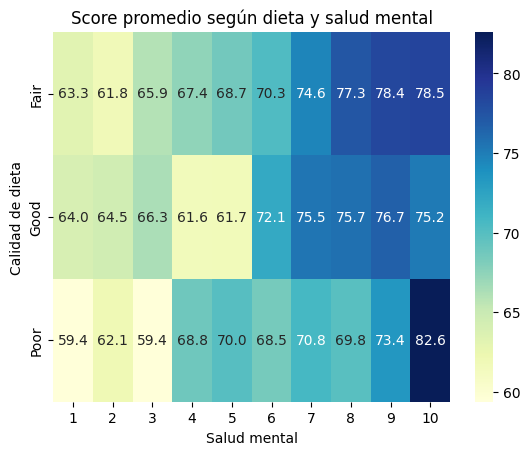

In [ ]:
# Heatmap: dieta + salud mental vs score
heatmap_data = hab.groupby(['diet_quality', 'mental_health_rating'])['exam_score'].mean().unstack()

sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap='YlGnBu')
plt.title("Score promedio según dieta y salud mental")
plt.ylabel("Calidad de dieta")
plt.xlabel("Salud mental")
plt.show()


📊 Regresión Lineal
MSE: 30.241213763941143
R²: 0.8885868369160034
------------------------------
📊 Árbol de Decisión
MSE: 61.84384884674241
R²: 0.7721579936874137
------------------------------


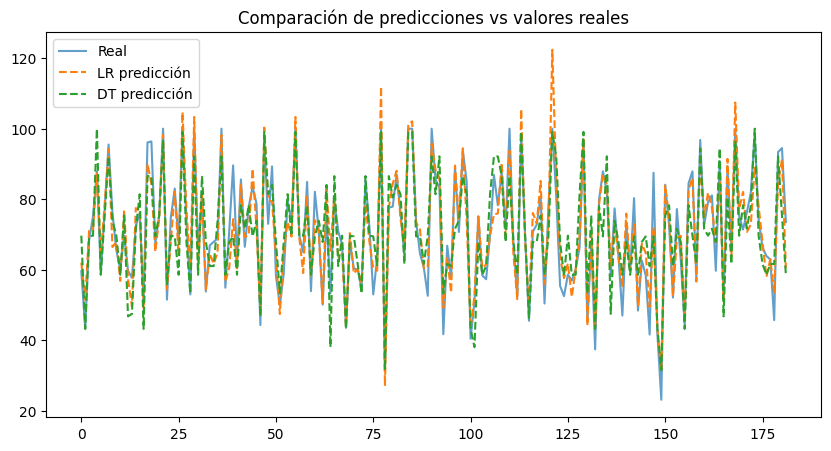

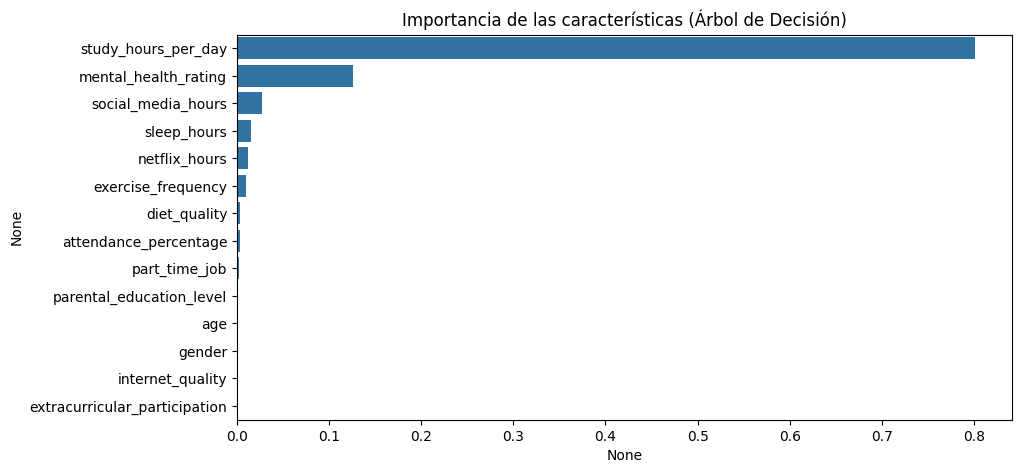

In [ ]:
# 1. Librerías
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Copia del DataFrame para evitar cambios en el original
df = hab.copy()

# 3. Codificación de variables categóricas
cat_cols = df.select_dtypes(include='object').columns

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# 4. Variables predictoras y objetivo
X = df.drop(columns=['exam_score', 'student_id'])  # Excluye ID y variable target
y = df['exam_score']

# 5. División entrenamiento / prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Modelos
# Regresión Lineal
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Árbol de Decisión
dt = DecisionTreeRegressor(max_depth=5, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# 7. Evaluación de modelos
def evaluar(y_true, y_pred, nombre_modelo):
    print(f"📊 {nombre_modelo}")
    print("MSE:", mean_squared_error(y_true, y_pred))
    print("R²:", r2_score(y_true, y_pred))
    print("-" * 30)

evaluar(y_test, y_pred_lr, "Regresión Lineal")
evaluar(y_test, y_pred_dt, "Árbol de Decisión")

# 8. Comparación visual
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Real', alpha=0.7)
plt.plot(y_pred_lr, label='LR predicción', linestyle='--')
plt.plot(y_pred_dt, label='DT predicción', linestyle='--')
plt.legend()
plt.title("Comparación de predicciones vs valores reales")
plt.show()

# 9. Importancia de características (solo Árbol de Decisión)
importances = pd.Series(dt.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances, y=importances.index)
plt.title("Importancia de las características (Árbol de Decisión)")
plt.show()


In [ ]:
!pip install plotly


In [ ]:
import plotly.express as px

# Relación entre horas de estudio y examen, coloreado por género
fig = px.scatter(
    hab,
    x='study_hours_per_day',
    y='exam_score',
    color='gender',
    size='attendance_percentage',
    hover_data=['social_media_hours', 'sleep_hours'],
    title='Relación entre horas de estudio y nota del examen por género'
)
fig.show()


# Tal vez el gráfico más claro que hayamos logrado hasta el momento, en donde podemos ir pasando el cursor por los distintos indicadores y así poder ver con mucha claridad